In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dx=0.01
x=np.arange(0,1+dx,dx)
N=x.size
f=1
m=1
w=2*np.pi*f
k=m*w**2

In [3]:
def V(x):
    return k*x**2



In [4]:
hbar=1
def k2(e,x):
    k=(2*m/hbar**2)*(e-V(x))
    return k

In [5]:
psi=np.zeros(N)
b=(dx**2)/12

def wavefunction(e):
    for i in range(1,N-1):
        if(n%2==0):
            psi[0]=1
            psi[1]=(1-5*b*k2(e,x[0]))/(1+b*k2(e,x[1]))
        else:
            psi[0]=0
            psi[1]=dx
        psi[i+1]=(2*psi[i]*(1-5*b*k2(e,x[i]))-(1+b*k2(e,x[i-1]))*psi[i-1])/(1+b*k2(e,x[i+1]))
        
        
    return psi

In [6]:
def countnodes(e):
    count=0
    for i in range(1,N-1):
        if(wavefunction(e)[i+1]==0):
            wavefunction(e)[i+1]=1e-8
        if np.sign(wavefunction(e)[i])!=np.sign(wavefunction(e)[i+1]):
            count=count+1
    return count


In [7]:
n=0

nodes=n
emin=0
emax=10
for i in range(200):
    e=0.5*(emin+emax)
    if(countnodes(e)<nodes):
        emin=e
    if(countnodes(e)>nodes):
        emax=e
    if(countnodes(e)==nodes):
        print(e)
        break

2.5


In [8]:
def matchingpoint(e):
    for i in range(0,N-1):
        if(k2(e,x[i])*k2(e,x[i+1]))<0:
            break
    return i


In [9]:
def normalize(e,p):
    for i in range(0,N-1):
        asum=0
        asum=asum+p[i]*p[i]
    g=1/np.sqrt(asum*dx)
    t=g*p
    return t


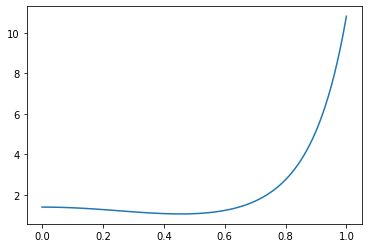

In [10]:
lpsi=np.zeros(N)
def lwavefunction(e):
    for i in range(N-2,0,-1):
        lpsi[N-1]=0
        lpsi[N-2]=dx
        lpsi[i-1]=(2*lpsi[i]*(1-5*b*k2(e,x[i]))-(1+b*k2(e,x[i+1]))*lpsi[i+1])/(1+b*k2(e,x[i-1]))
    return lpsi
plt.plot(x,normalize(e,wavefunction(e)))
#plt.plot(x,normalize(e,lwavefunction(e)))
        

In [13]:
def matching(e):
    
    l=normalize(e,wavefunction(e))
    r=normalize(e,lwavefunction(e))
    icl=matchingpoint(e)
    m=l[icl]/r[icl]
    p=r*m
    d=np.zeros((icl))
    c=np.zeros(N-icl)
    c=p[icl:N]
    d=l[0:icl]
    f=np.concatenate((d,c))
    return f
def checking(e):
    icl=matchingpoint(e)
    return matching(e)[icl+1]+matching(e)[icl-1]-2*matching(e)[icl]
checking(e)


-0.022435746950452806

In [14]:
for i in range(100):
    e=0.5*(emin+emax)
    if(checking(emax)*checking(e)<0):
        emin=e
    else:
        emax=e
    if(np.abs(checking(e))<1e-10):
        print(e)
        break
        
    
    
    


4.448667721853781


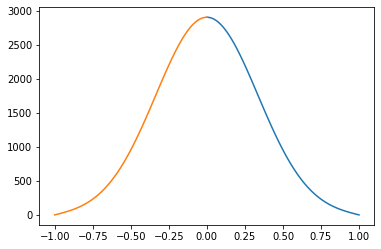

In [15]:
plt.plot(x,matching(e))
plt.plot(-x,matching(e))